In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


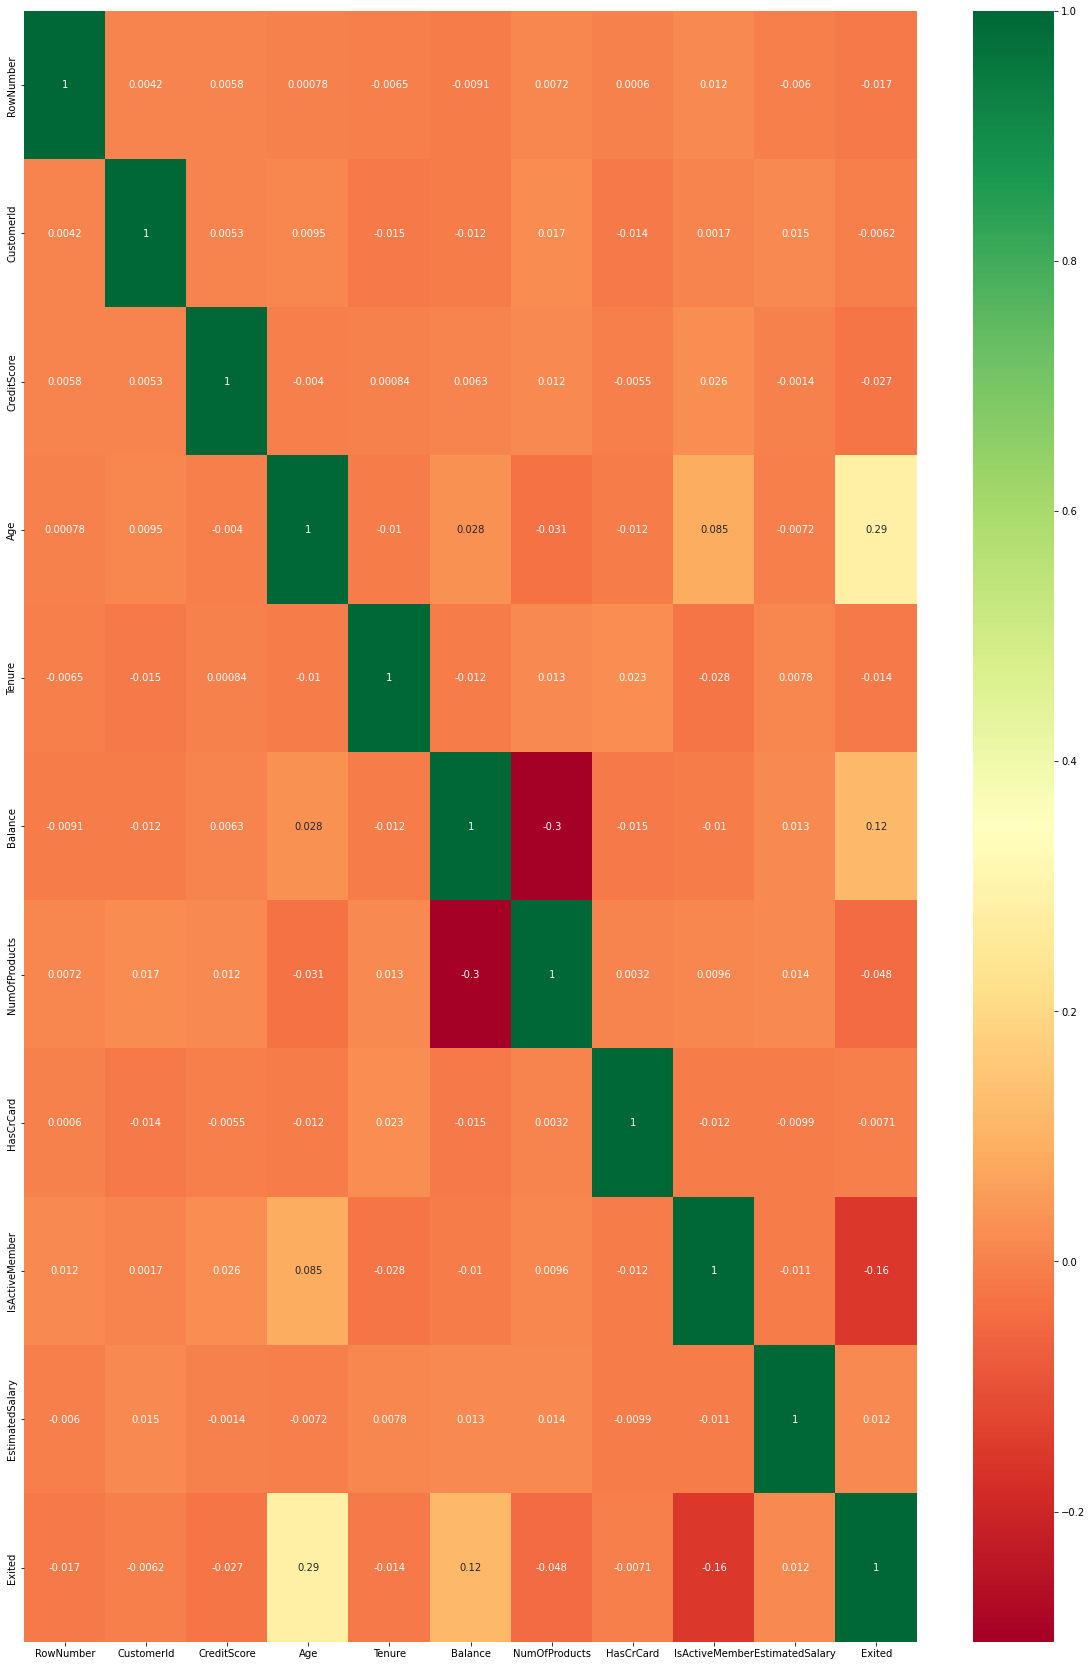

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
x=df.iloc[:,3:13] 
y=df.iloc[:,13]

In [10]:
geography=pd.get_dummies(x['Geography'],drop_first=True)

In [11]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [12]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [13]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [14]:
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
x=pd.concat([x,geography,gender],axis=1)

In [17]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
#hyper parameters optimization

params={
   "learning-rate"     :[0.05,0.10,0.15,0.20,0.25,0.30],
   "max_depth"         :[3,4,5,6,8,10,12,15],
   "min_child_weight"  :[1,3,5,7],
   "gamma"             :[0.0,0.1,0.2,0.3,0.4],
   "colsample_bytree"  :[0.3,0.4,0.5,0.7]
   }

In [19]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [20]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [21]:
classifier=xgboost.XGBClassifier()

In [22]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [25]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 15.59 seconds.
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [26]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning-rate=0.05, max_depth=4,
              min_child_weight=3)

In [28]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning-rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 3}

In [29]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [31]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)

In [32]:
score

array([0.88 , 0.866, 0.872, 0.873, 0.867, 0.857, 0.862, 0.881, 0.859,
       0.857])

In [33]:
score.mean()

0.8674